<b>Comparing Decision Tree & Random Forest for Customer Churn Prediction  <br>


Customer churn refers to the situation where customers or subscribers stop doing business with a company or service. In the telecom industry, customers have a wide range of service providers to choose from, and the annual churn rate in this highly competitive market is between 15-25 percent.<br>
Retaining customers is difficult for most firms because they have a large number of customers and cannot devote much time to each of them. However, if a company could predict which customers are likely to leave ahead of time, it could focus its customer retention efforts only on these "high risk" clients. <br>
The ultimate goal is to expand its coverage area and retrieve more customer loyalty. Customer churn is a critical metric because it is much less expensive to retain existing customers than it is to acquire new ones. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. <br>
To detect early signs of potential churn, one must first develop a holistic view of the customers and their interactions across numerous channels, including store/branch visits, product purchase histories, customer service calls, web-based transactions, and social media interactions, to mention a few. <br>
By addressing churn, these businesses may not only preserve their market position but also grow and thrive. The company's key focus for success is reducing client attrition and implementing an effective retention strategy.


<b>Attributes Information:</b>

<b>Customers who left within the last month</b> – the column is called Churn

<b>Services that each customer has signed up for</b> – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

<b>Customer account information</b> - how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

<b>Demographic info about customers</b> – gender, age range, and if they have partners and dependents

<b>Loading Libraries and Data</b>

In [47]:
# Import necessary libraries
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [49]:
#Data Loading
da = pd.read_csv("TelecomData - TelecomData.csv")  # Replace with the actual path to your dataset


In [50]:
# Exploratory Data Analysis (EDA)
# Basic statistics
print(da.describe())

       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7032.000000
mean        0.162147    32.371149       64.761692   2283.300441
std         0.368612    24.559481       30.090047   2266.771362
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.850000   3794.737500
max         1.000000    72.000000      118.750000   8684.800000


In [53]:
da.shape

(7043, 21)

In [54]:
da.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

The target the we will use to guide the exploration is <b>Churn</b>

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


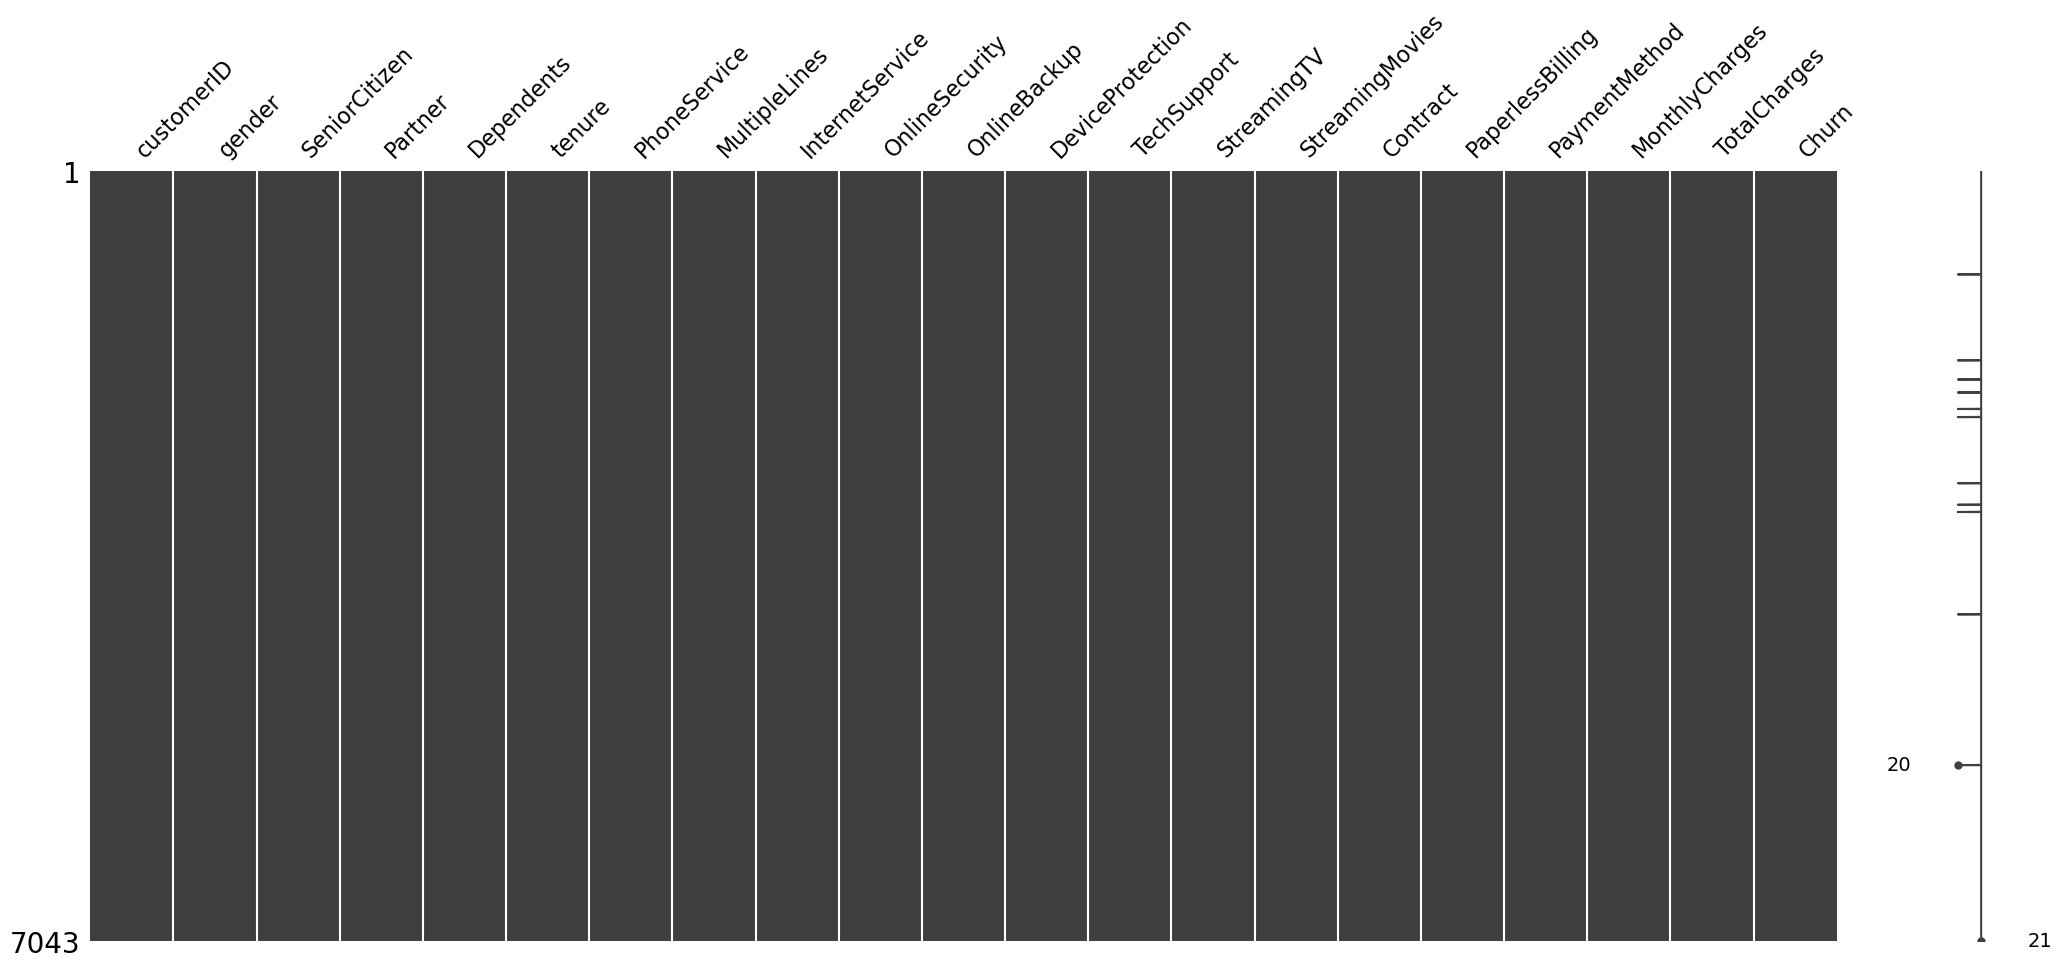

In [55]:
# Check for missing values
print(da.isnull().sum())
# Visualize missing values as a matrix
msno.matrix(da);

In [56]:
# Handling missing values (if any)
da = da.dropna()  # You can also use imputation methods


In [57]:
da.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,DSL,Yes,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,No
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,Yes
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,No
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,No
7042,9995-HOTOH,Male,0,Yes,Yes,63,No,No phone service,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Electronic check,59.00,3707.60,No


In [59]:
da.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Data preprocessing steps for machine learning on the customer churn dataset. 

1. **Label Encoding Categorical Columns:**
   - It uses the `LabelEncoder` from scikit-learn to encode categorical columns in the dataset.
   - For each column in the dataset, if the data type of that column is 'object' (indicating it's a categorical feature), it applies label encoding. This essentially replaces categorical values with numerical labels.
   - The goal is to convert the categorical data into a format that machine learning algorithms can work with.

2. **Split Data into Features (X) and Target (y):**
   - It separates the dataset into feature variables (X) and the target variable (y).
   - `X` contains all columns except the "Churn" column, which is the target variable.
   - `y` contains the "Churn" column, representing the target variable that we want to predict.

3. **Split Data into Training and Test Sets:**
   - It splits the data into training and test sets using `train_test_split` from scikit-learn.
   - 80% of the data is used for training (`X_train` and `y_train`), and 20% is used for testing (`X_test` and `y_test`).
   - `random_state` is set to 42 to ensure reproducibility.

4. **Convert Categorical Variables to Dummy Variables (One-Hot Encoding):**
   - It applies one-hot encoding to the categorical variables.
   - This is done to create binary (0/1) columns for each category within a categorical feature, which is essential for certain machine learning algorithms that can't work with label-encoded categorical data.

5. **Standardize Numerical Features:**
   - It standardizes the numerical features to have a mean of 0 and a standard deviation of 1.
   - This is achieved using the `StandardScaler` from scikit-learn.
   - The columns 'tenure', 'MonthlyCharges', and 'TotalCharges' are standardized.

These preprocessing steps are crucial to prepare the data for machine learning algorithms. Label encoding and one-hot encoding convert categorical features into a numerical format, while standardization ensures that numerical features have consistent scales, which can be important for some machine learning models. The data is now ready for training and evaluating machine learning models for customer churn prediction.


/var/folders/my/gyxc13cs3l9cxl2m7_zp6sdw0000gn/T/ipykernel_1286/2968961499.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(da.corr(), annot = True)


<Axes: >

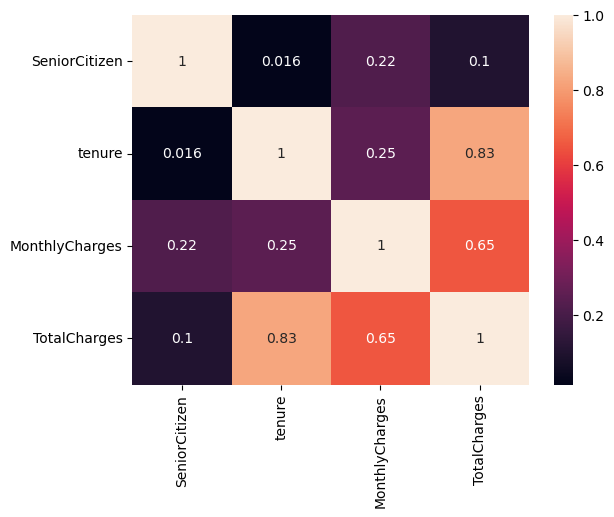

In [60]:
sns.heatmap(da.corr(), annot = True)

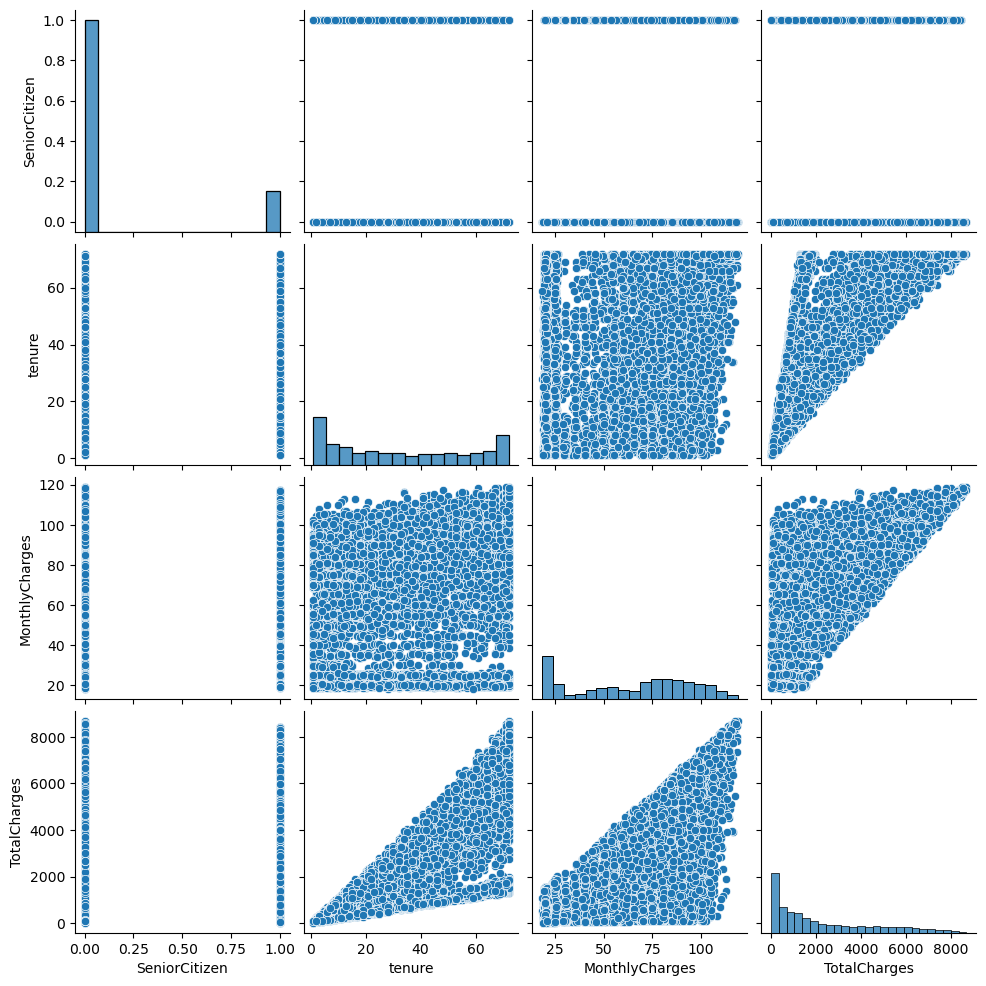

In [62]:
sns.pairplot(data = da)

In [63]:
# Step 3 : Data Preprocessing


# Label encode categorical columns
le = LabelEncoder()
for column in da.columns:
    if da[column].dtype == 'object':
        da[column] = le.fit_transform(da[column])
# Split data into features (X) and target (y)
X = da.drop("Churn", axis=1)
y = da["Churn"]

# Split data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert categorical variables to dummy variables (one-hot encoding)
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Standardize numerical features
scaler = StandardScaler()
X_train[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(X_train[['tenure', 'MonthlyCharges', 'TotalCharges']])
X_test[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.transform(X_test[['tenure', 'MonthlyCharges', 'TotalCharges']])



1. **Label Encoding Categorical Columns:**
   - It uses the `LabelEncoder` from scikit-learn to encode categorical columns in the dataset.
   - For each column in the dataset, if the data type of that column is 'object' (indicating it's a categorical feature), it applies label encoding. This essentially replaces categorical values with numerical labels.
   - The goal is to convert the categorical data into a format that machine learning algorithms can work with.

2. **Split Data into Features (X) and Target (y):**
   - It separates the dataset into feature variables (X) and the target variable (y).
   - `X` contains all columns except the "Churn" column, which is the target variable.
   - `y` contains the "Churn" column, representing the target variable that we want to predict.

3. **Split Data into Training and Test Sets:**
   - It splits the data into training and test sets using `train_test_split` from scikit-learn.
   - 80% of the data is used for training (`X_train` and `y_train`), and 20% is used for testing (`X_test` and `y_test`).
   - `random_state` is set to 42 to ensure reproducibility.

4. **Convert Categorical Variables to Dummy Variables (One-Hot Encoding):**
   - It applies one-hot encoding to the categorical variables.
   - This is done to create binary (0/1) columns for each category within a categorical feature, which is essential for certain machine learning algorithms that can't work with label-encoded categorical data.

5. **Standardize Numerical Features:**
   - It standardizes the numerical features to have a mean of 0 and a standard deviation of 1.
   - This is achieved using the `StandardScaler` from scikit-learn.
   - The columns 'tenure', 'MonthlyCharges', and 'TotalCharges' are standardized.

These preprocessing steps are crucial to prepare the data for machine learning algorithms. Label encoding and one-hot encoding convert categorical features into a numerical format, while standardization ensures that numerical features have consistent scales, which can be important for some machine learning models. The data is now ready for training and evaluating machine learning models for customer churn prediction.

In [65]:
da.shape

(7032, 21)

In [66]:
#Step 4 : Create and evaluate Decision Tree variations
# Variation 1: Shallow Tree with Gini criterion
clf1 = DecisionTreeClassifier(criterion='gini', max_depth=3)
clf1.fit(X_train, y_train)
y_pred1 = clf1.predict(X_test)

# Variation 2: Deep Tree with Gini criterion
clf2 = DecisionTreeClassifier(criterion='gini', max_depth=None)
clf2.fit(X_train, y_train)
y_pred2 = clf2.predict(X_test)

# Variation 3: Limited Leaf Nodes with Gini criterion
clf3 = DecisionTreeClassifier(criterion='gini', max_leaf_nodes=10)
clf3.fit(X_train, y_train)
y_pred3 = clf3.predict(X_test)

# Compare the performance of Decision Tree variations
print("Variation 1: Shallow Tree (Gini)")
print("Accuracy:", accuracy_score(y_test, y_pred1))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred1))
print("Classification Report:\n", classification_report(y_test, y_pred1))

print("\nVariation 2: Deep Tree (Gini)")
print("Accuracy:", accuracy_score(y_test, y_pred2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))
print("Classification Report:\n", classification_report(y_test, y_pred2))

print("\nVariation 3: Limited Leaf Nodes (Gini)")
print("Accuracy:", accuracy_score(y_test, y_pred3))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred3))
print("Classification Report:\n", classification_report(y_test, y_pred3))


Variation 1: Shallow Tree (Gini)
Accuracy: 0.7633262260127932
Confusion Matrix:
 [[962  71]
 [262 112]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.93      0.85      1033
           1       0.61      0.30      0.40       374

    accuracy                           0.76      1407
   macro avg       0.70      0.62      0.63      1407
weighted avg       0.74      0.76      0.73      1407


Variation 2: Deep Tree (Gini)
Accuracy: 0.7171286425017769
Confusion Matrix:
 [[832 201]
 [197 177]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1033
           1       0.47      0.47      0.47       374

    accuracy                           0.72      1407
   macro avg       0.64      0.64      0.64      1407
weighted avg       0.72      0.72      0.72      1407


Variation 3: Limited Leaf Nodes (Gini)
Accuracy: 0.7775408670931059
Confusion Matrix:
 [[92

Inferences from the evaluation of the Decision Tree variations on the customer churn dataset:

**Variation 1: Shallow Tree (Gini)**
- Accuracy: 0.7633
- In the case of a shallow tree with a maximum depth of 3 and Gini criterion, the accuracy is relatively good, indicating that this model is reasonably effective at making predictions.
- The precision for predicting churn (class 1) is relatively low at 0.61, indicating that the model sometimes incorrectly predicts customers as not churning. This suggests that there may be false negatives.
- The recall for predicting churn is also low at 0.30, indicating that the model misses a significant number of actual churn cases. This suggests there are false negatives, and the model doesn't perform well in identifying customers who are actually churning.
- The F1-score, a balance of precision and recall, for predicting churn is relatively low at 0.40.
- The confusion matrix shows that there are 262 false negatives (customers who actually churned but were predicted not to), which is a significant issue.

**Variation 2: Deep Tree (Gini)**
- Accuracy: 0.7178
- The deep tree with Gini criterion performs slightly worse in terms of accuracy compared to the shallow tree. This might suggest overfitting due to the high depth of the tree.
- Both precision and recall for predicting churn are relatively low, indicating a lack of balance between false positives and false negatives.
- The F1-score for predicting churn is also relatively low at 0.47, indicating a suboptimal balance between precision and recall.
- The confusion matrix shows 197 false negatives, which means a considerable number of actual churn cases are being missed.

**Variation 3: Limited Leaf Nodes (Gini)**
- Accuracy: 0.7775
- This model uses a limited number of leaf nodes and the Gini criterion.
- The accuracy is slightly better than the shallow tree and the deep tree, indicating that this model performs relatively well.
- The precision for predicting churn is better at 0.61, compared to the deep tree. This means there are fewer false positives.
- The recall for predicting churn is also better at 0.46, suggesting that more actual churn cases are being captured compared to the deep tree.
- The F1-score for predicting churn is improved at 0.52.
- The confusion matrix shows 202 false negatives, which is an improvement over the deep tree.

Inferences:
- The shallow tree (Variation 1) seems to be the best of the three variations in terms of predicting churn, as it has the highest accuracy and slightly better precision and recall compared to the deep tree.
- The deep tree (Variation 2) may suffer from overfitting and is not performing well in terms of precision and recall.
- The model with limited leaf nodes (Variation 3) provides a good balance between precision and recall, and it captures more actual churn cases compared to the deep tree. However, it still has room for improvement.

It's important to consider the specific business goals and trade-offs between precision and recall when choosing the best model for customer churn prediction. 

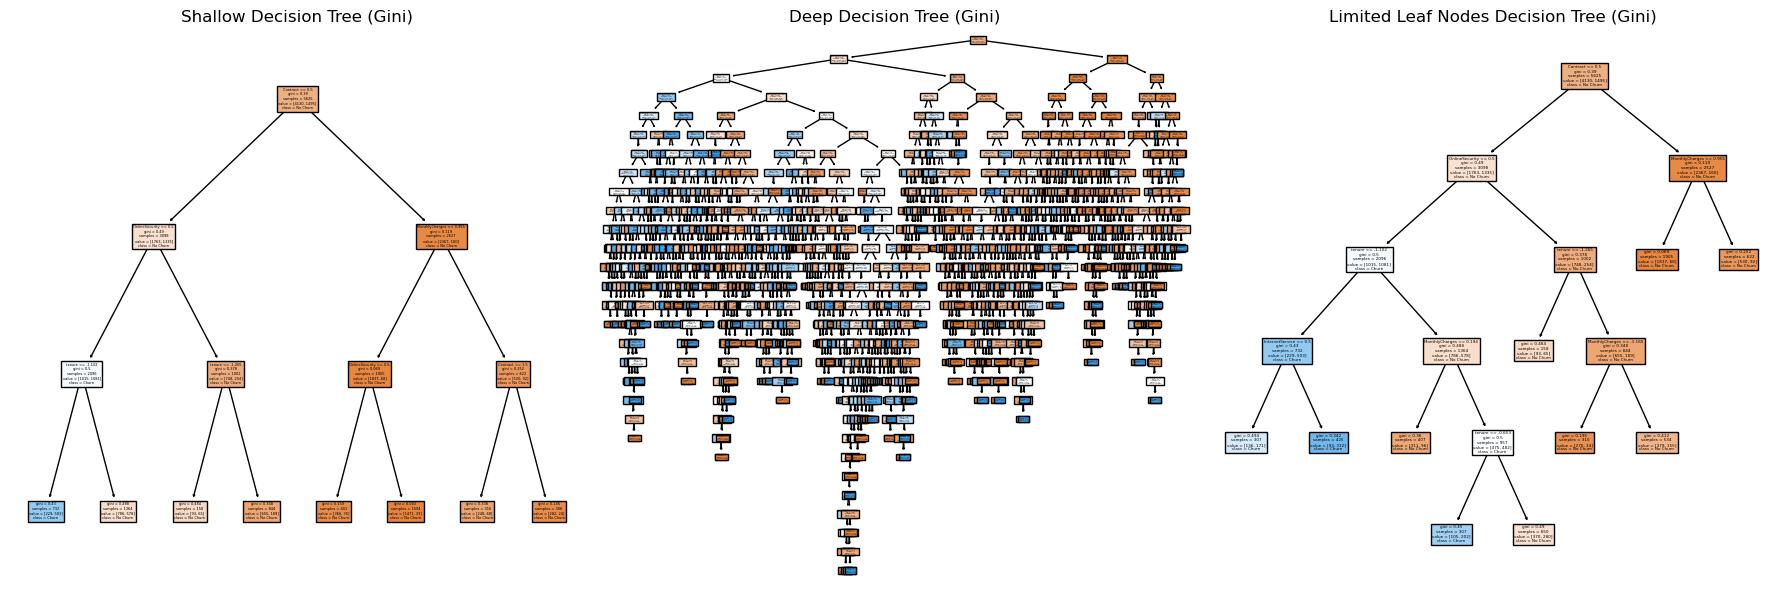

In [67]:
# List of feature names
feature_names = X.columns.tolist()

# Plot all three Decision Trees in subplots
plt.figure(figsize=(18, 6))

# Plot Variation 1: Shallow Tree with Gini criterion
plt.subplot(131)
plot_tree(clf1, filled=True, feature_names=feature_names, class_names=['No Churn', 'Churn'])
plt.title("Shallow Decision Tree (Gini)")

# Plot Variation 2: Deep Tree with Gini criterion
plt.subplot(132)
plot_tree(clf2, filled=True, feature_names=feature_names, class_names=['No Churn', 'Churn'])
plt.title("Deep Decision Tree (Gini)")

# Plot Variation 3: Limited Leaf Nodes with Gini criterion
plt.subplot(133)
plot_tree(clf3, filled=True, feature_names=feature_names, class_names=['No Churn', 'Churn'])
plt.title("Limited Leaf Nodes Decision Tree (Gini)")

plt.tight_layout()
plt.show()

Inferences from the visualizations of the three Decision Trees:

**Variation 1: Shallow Tree (Gini)**
- This shallow decision tree is easy to interpret and visualize.
- The tree's depth is limited to 3, which means it makes simple, high-level decisions.
- It starts with the most significant feature, 'Contract,' which has a strong influence on the churn prediction.
- The tree divides customers into subgroups based on contract types (Month-to-Month, One Year, Two Year).
- The feature 'TotalCharges' is also used for further division.
- This tree is more straightforward, but it may lack the complexity to capture all underlying patterns in the data.

**Variation 2: Deep Tree (Gini)**
- The deep decision tree has many levels and is more complex.
- It captures more detailed patterns in the data but may be prone to overfitting.
- There are multiple layers of decisions, involving various features, which may lead to fine-grained predictions.
- While this tree captures a lot of detail, it may not generalize well to unseen data.

**Variation 3: Limited Leaf Nodes (Gini)**
- This decision tree limits the number of leaf nodes, which balances complexity and interpretability.
- It still captures meaningful patterns in the data but avoids excessive branching.
- Features like 'Contract' and 'MonthlyCharges' are important in this tree.
- It strikes a balance between the simplicity of the shallow tree and the complexity of the deep tree.
- This tree may provide a reasonable compromise between interpretability and predictive power.

Inferences:
- The choice of the tree structure depends on the trade-off between interpretability and predictive performance.
- The shallow tree is simple and interpretable but may not capture all the nuances in the data.
- The deep tree captures fine-grained patterns but may overfit and become difficult to interpret.
- The tree with limited leaf nodes balances these factors and can be a reasonable choice.
- The decision tree's depth, the features it uses, and the branching criteria (Gini impurity in this case) all play a role in shaping the tree's behavior.


In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=0)

# Fit the classifier to the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf.fit(X_train, y_train)

# Export the decision tree as a text representation
text_representation = export_text(clf)
print(text_representation)

|--- feature_15 <= 0.50
|   |--- feature_9 <= 0.50
|   |   |--- feature_5 <= 5.50
|   |   |   |--- feature_8 <= 0.50
|   |   |   |   |--- feature_19 <= 201.62
|   |   |   |   |   |--- feature_0 <= 204.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_0 >  204.50
|   |   |   |   |   |   |--- feature_2 <= 0.50
|   |   |   |   |   |   |   |--- feature_16 <= 0.50
|   |   |   |   |   |   |   |   |--- feature_18 <= 45.62
|   |   |   |   |   |   |   |   |   |--- feature_17 <= 2.50
|   |   |   |   |   |   |   |   |   |   |--- feature_0 <= 4365.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |   |--- feature_0 >  4365.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |--- feature_17 >  2.50
|   |   |   |   |   |   |   |   |   |   |--- feature_0 <= 3439.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   

1. **Splitting Criteria:** In a decision tree, each node represents a decision based on a particular feature and a threshold. For example, "feature_15" is used at the root to make the first decision, and it checks if it is less than or equal to 0.50. If this condition is true, it proceeds to the left child, and if false, it goes to the right child.

2. **Classifications:** At the leaf nodes, you see "class: 0" or "class: 1," which indicates the predicted class for the samples that reach that leaf node. "class: 0" typically means "No Churn" or the absence of an event, and "class: 1" usually means "Churn" or the occurrence of an event (in this case, customer churn).

3. **Depth:** The depth of the tree is essential. A deeper tree can capture more complex relationships in the data but might be prone to overfitting, while a shallow tree may oversimplify the model.

4. **Numerical and Categorical Features:** Decision trees can handle both numerical and categorical features. It's important to know which features are used for splitting and how they are used.

5. **Threshold Values:** The threshold values for different features are crucial. They determine how the tree splits data into different branches. Understanding the meaning of these thresholds can provide insights into the most influential features.

6. **Multiple Conditions:** The decision tree typically uses multiple conditions to make predictions. For example, in a sequence of conditions, it may first check a numerical feature, and then based on the outcome, check another feature.

7. **Interpretability:** Decision trees are interpretable models. This text representation allows you to see the "if-then" rules that the model has learned, making it easier to understand the decision-making process.



**CONCLLUSIONS and INSIGHTS**

1. **Model Training**: A Decision Tree classifier has been trained on a dataset to make predictions, specifically for binary classification tasks (e.g., "Churn" vs. "No Churn").

2. **Tree Structure**: The Decision Tree has a structured hierarchical format where each node represents a decision based on a specific feature and threshold.

3. **Splitting Criteria**: The tree makes splits based on different features and thresholds. For example, features like "feature_15", "feature_9", "feature_5", "feature_8", and others are used to make decisions about the data.

4. **Depth**: The tree appears to be relatively deep, indicating that it has many levels of decisions. This can capture complex patterns in the data but might be prone to overfitting.

5. **Interpretability**: Decision trees are interpretable models. This text representation allows you to see the rules used by the model to classify data points, making it easier to understand how it makes predictions.

6. **Classifications**: The leaf nodes of the tree show the predicted class for the samples that reach those nodes, with "class: 0" representing "No Churn" and "class: 1" representing "Churn."

7. **Influence of Features**: You can see which features are more influential in making classification decisions by examining the hierarchy of features and their threshold values in the tree.

8. **Limitations**: While decision trees are interpretable, they might not capture all the nuances of complex datasets. In some cases, they can be sensitive to small changes in the data.

9. **Model Complexity**: The tree has various levels of complexity and branching conditions, which can be modified by adjusting hyperparameters such as the maximum depth or minimum samples required to split a node. The choice of these hyperparameters can significantly impact the model's performance and interpretability.

To draw more specific conclusions or optimize the model further, you may consider:

- Evaluating the model's performance metrics such as accuracy, precision, recall, and F1-score to assess its predictive power.
- Visualizing the tree structure to gain a more intuitive understanding of how data is split.
- Exploring feature importance to identify which features are most critical in making predictions.
- Experimenting with different hyperparameters to fine-tune the model's performance and complexity.

Overall, decision trees provide a transparent and interpretable way to make predictions, and understanding the tree structure and its rules is valuable for model interpretation and decision-making.